In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados_15_03.csv',index_col=[0])

In [3]:
df_workers = df[df['What is your segment of acting?']!='Academia/Research Institution']
df_academy = df[df['What is your segment of acting?']=='Academia/Research Institution']
print(df_workers.shape,df_academy.shape)

(191, 247) (161, 247)


### Distribuição, dentro dos grupos, de quem trabalha diretamente com economia circular

In [4]:
df_workers['Do you act directly with the circular economy?'].value_counts()

Do you act directly with the circular economy?
1                                                     125
0                                                      47
SÃÂ¬                                                  14
Maybe                                                   1
Partly - not 100% focused                               1
Starting  Sustainable Start-up                          1
Indirectly by providing waste recycling equipment       1
Partly through work in production                       1
Name: count, dtype: int64

In [5]:
df_academy['Do you act directly with the circular economy?'].replace({'SÃÂ¬':'0',
                                                                      'I conduct the research in this area and I worked as project manager in the project aiming at Circular Public Procurement implementation.':'1',
                                                                      'I am not sure what that means. ':'1',
                                                                      'Sustainability/Engineering':'1',
                                                                      'I have a degree in circular economy, but currently donÃÂ´t work directly with that ':'1',
                                                                      'Indirectly through other sustainability efforts':'1',
                                                                      'non comprendo la domanda':'0'
                                                                      },inplace=True)

C:\Users\ednae\AppData\Local\Temp\ipykernel_14948\2881593402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_academy['Do you act directly with the circular economy?'].replace({'SÃÂ¬':'0',


In [6]:
df_academy['Do you act directly with the circular economy?'].value_counts()

Do you act directly with the circular economy?
1    92
0    69
Name: count, dtype: int64

In [22]:
df_workers['Do you act directly with the circular economy?'].value_counts()

Do you act directly with the circular economy?
1                                                     125
0                                                      47
SÃÂ¬                                                  14
Maybe                                                   1
Partly - not 100% focused                               1
Starting  Sustainable Start-up                          1
Indirectly by providing waste recycling equipment       1
Partly through work in production                       1
Name: count, dtype: int64

In [7]:
df['worker_academy'] = '-'

In [8]:
for num in np.arange(df.shape[0]):
    if df['What is your segment of acting?'][num]=='Academia/Research Institution':
        df['worker_academy'][num] = 'Pesquisador'
    elif df['What is your segment of acting?'][num]!='Academia/Research Institution':
        df['worker_academy'][num] = 'Profissional da área'

C:\Users\ednae\AppData\Local\Temp\ipykernel_14948\2917821162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['worker_academy'][num] = 'Pesquisador'
C:\Users\ednae\AppData\Local\Temp\ipykernel_14948\2917821162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['worker_academy'][num] = 'Pesquisador'
C:\Users\ednae\AppData\Local\Temp\ipykernel_14948\2917821162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['worker_acade

C:\Users\ednae\AppData\Local\Temp\ipykernel_14948\2917821162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['worker_academy'][num] = 'Profissional da área'
C:\Users\ednae\AppData\Local\Temp\ipykernel_14948\2917821162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['worker_academy'][num] = 'Pesquisador'
C:\Users\ednae\AppData\Local\Temp\ipykernel_14948\2917821162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wor

In [9]:
df['worker_academy'].value_counts()

worker_academy
Profissional da área    191
Pesquisador             161
Name: count, dtype: int64

In [18]:
df['worker_academy'].value_counts()

worker_academy
Profissional da área    191
Pesquisador             161
Name: count, dtype: int64

In [ ]:
Do you act directly with the circular economy?
1    92
0    69

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Pesquisadores', 'Profissionais da área'])

fig.add_trace(go.Pie(labels=['Sim','Não'], 
                             values=[92,69], hole=.3, name = 'Pesquisadores'),1,1) #pesquisador

fig.add_trace(go.Pie(labels=['Sim','Não'], 
                             values=[129,62], hole=.3, name = 'Trabalhadores da área'),1,2) #workers



fig.show()

### LOCAIS

In [32]:
df['Local'].value_counts()

Local
Denmark                              113
Pakistan                             104
Brazil                                67
Italy                                 23
Netherlands                            4
Spain                                  4
USA                                    3
Bologna                                3
Canada                                 2
Brasil                                 2
Sweden                                 2
Germany                                1
Belgium                                1
De                                     1
UK                                     1
North Jutland                          1
India                                  1
Serbia                                 1
South Africa                           1
South Asia                             1
Holanda, Amsterdam                     1
Lithuania                              1
Egypt                                  1
India, Kashmir, Baramullah             1
Switzerlan

In [34]:
# FAZER ESSE COM OS LOCAIS

In [33]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

## Gráficos

### NIVEL DE CONHECIMENTO SOBRE EC

In [ ]:
print(df_workers['Self knowledge about circular economy'].value_counts(normalize=True))
print(df_academy['Self knowledge about circular economy'].value_counts(normalize=True))

Self knowledge about circular economy
4.0    0.685864
3.0    0.230366
2.0    0.068063
5.0    0.010471
1.0    0.005236
Name: proportion, dtype: float64
Self knowledge about circular economy
4.0    0.583851
3.0    0.260870
2.0    0.105590
5.0    0.037267
1.0    0.012422
Name: proportion, dtype: float64


In [ ]:
for i in range(df_workers.shape[0]):
    pct = (df_workers['Self knowledge about circular economy'][i] / total_runs) * 100
    percentage.append(round(pct, 2))

KeyError: 0

([<matplotlib.axis.XTick at 0x24e1090c260>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

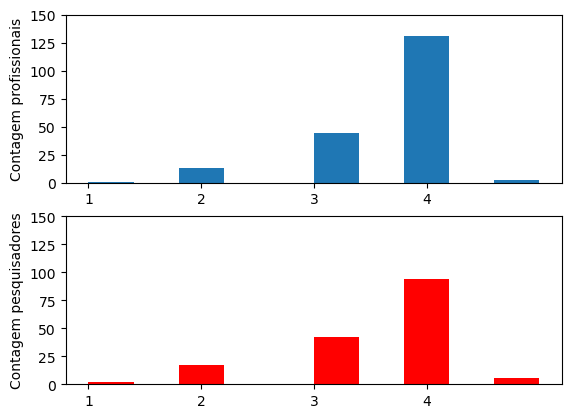

In [ ]:
from matplotlib import pyplot as plt

plt.style.use('default')

plt.subplot(2, 1, 1)
plt.hist(x=df_workers['Self knowledge about circular economy'])#, y=df.index)
plt.ylabel('Contagem profissionais')
plt.ylim((0,150))
plt.xticks(np.arange(1,5,1))

plt.subplot(2, 1, 2)
plt.hist(x=df_academy['Self knowledge about circular economy'], color='red')
plt.ylabel('Contagem pesquisadores')
plt.ylim((0,150))
plt.xticks(np.arange(1,5,1))

### TREEMAP NIVEL DE CONHECIMENTO - WORKER OU ACADEMY - ATUA DIRETAMENTE

### Radarcharts

In [ ]:
academy_criterios[2].median()

M1.2     4.0
M2.2     4.0
M3.2     4.0
M4.2     4.0
M5.2     4.0
M6.2     4.0
M7.2     4.0
M8.2     4.0
M9.2     4.0
M10.2    4.0
M11.2    4.0
M12.2    4.0
M13.2    4.0
M14.2    4.0
M15.2    4.0
M16.2    4.0
M17.2    4.0
M18.2    4.0
M19.2    4.0
M20.2    4.0
M21.2    4.0
M22.2    4.0
M23.2    4.0
M24.2    4.0
dtype: float64